In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import io
import sys
sys.setrecursionlimit(10000000)

In [2]:

'''
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/birds_data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1-kILh7-OMeCYny7rlycroie7scKvmDQ-' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  # print('title: %s, id: %s' % (f['title'], f['id']))
  # fname = os.path.join(local_download_path, f['title'])
  # print('downloading to {}'.format(fname))
  # f_ = drive.CreateFile({'id': f['id']})
  # f_.GetContentFile(fname)
  if f['title'] == '20180620_BISC_BirdFlight_SOKE_0362_copy.jpg':
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = os.path.join(local_download_path, f['title'])
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)
'''

'\n!pip install -U -q PyDrive\nimport os\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n\n# 1. Authenticate and create the PyDrive client.\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\n\n# choose a local (colab) directory to store the data.\nlocal_download_path = os.path.expanduser(\'~/birds_data\')\ntry:\n  os.makedirs(local_download_path)\nexcept: pass\n\n# 2. Auto-iterate using the query syntax\n#    https://developers.google.com/drive/v2/web/search-parameters\nfile_list = drive.ListFile(\n    {\'q\': "\'1-kILh7-OMeCYny7rlycroie7scKvmDQ-\' in parents"}).GetList()\n\nfor f in file_list:\n  # 3. Create & download by id.\n  # print(\'title: %s, id: %s\' % (f[\'title\'], f[\'id\']))\n  # fname = os.path.join(local_download_path, f[\'title\'])\n  # print(\'downloading to {}\'.format(

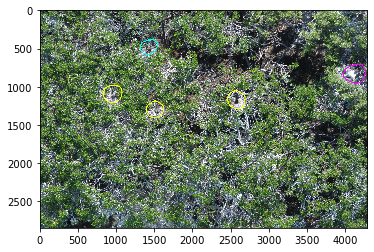

In [3]:
#pathnames = glob.glob('/root/birds_data/20180620_BISC_BirdFlight_SOKE_0362_copy.jpg', recursive=True)
#print(pathnames)
#img = mpimg.imread(pathnames[0]) #The processed image
img = io.imread('image1.jpg')
plt.imshow(img)


In [4]:
#arr = skimage.io.imread('20180620_BISC_BirdFlight_SOKE_0362_copy.jpg') In case we need more speed? Messy to work with 3D array though

In [5]:
# circleColors = [red, crimson, maroon, blue, cyan, magenta, yellow, purple, pink]
# yellow range = (200-255, 200-255, 0-50)
# cyan range = (0-60, 200-255, 200-255)
# pink range = (200-255, 0-60, 200-255)
# blue range = (0-60, 0-100, 200-255)
def isYellow(triple):
  return (triple[0] <= 255 and triple[0] >= 200 and triple[1] <= 255 and triple[1] >= 200 and triple[2] <= 50 and triple[2] >= 0)

def isCyan(triple):
  return (triple[0] <= 130 and triple[0] >= 0 and triple[1] <= 255 and triple[1] >= 150 and triple[2] <= 255 and triple[2] >= 150)

def isPink(triple):
  return (triple[0] <= 255 and triple[0] >= 200 and triple[1] <= 60 and triple[1] >= 0 and triple[2] <= 255 and triple[2] >= 200)

def isBlue(triple):
  return (triple[0] <= 60 and triple[0] >= 0 and triple[1] <= 100 and triple[1] >= 0 and triple[2] <= 255 and triple[2] >= 200)
    
def isMuxoColor(triple):
  if isPink(triple):
    return isPink
  elif isCyan(triple):
    return isCyan
  elif isBlue(triple):
    return isBlue
  elif isYellow(triple):
    return isYellow
  else:
    return False


In [6]:
row1 = img[0]

In [7]:
# THIS APPROACH DOES NOT WORK (it finds a global xmin and xmax, ymin and ymax
# for each color)
# i.e. two yellow circles in the same column will be marked together in one really 
# tall bounding box
# approach without recursion (hopefully faster because of how NumPy uses C)

# each color in the list is of the form [[rmin, rmax],[gmin,gmax],[bmin,bmax]]
'''
for color in color_list:
  whether_color = color[0][0] < img[:,:0] and color[0][1] > img[:,:,0] and \
  color[1][0] < img[:,:,1] and color[1][1] > img[:,:,1] and \
  color[2][0] < img[:,:,2] and color[2][1] > img[:,;.2]

  # list of [x,y] pairs that have the given color
  array_of_locations_of_color = np.argwhere(whether_color), 
  [xmax,ymax] = np.amax(array_of_locations_of_color, axis=0)
  [xmin,ymin] = np.amin(array_of_locations_of_color, axis=0)
'''

'\nfor color in color_list:\n  whether_color = color[0][0] < img[:,:0] and color[0][1] > img[:,:,0] and   color[1][0] < img[:,:,1] and color[1][1] > img[:,:,1] and   color[2][0] < img[:,:,2] and color[2][1] > img[:,;.2]\n\n  # list of [x,y] pairs that have the given color\n  array_of_locations_of_color = np.argwhere(whether_color), \n  [xmax,ymax] = np.amax(array_of_locations_of_color, axis=0)\n  [xmin,ymin] = np.amin(array_of_locations_of_color, axis=0)\n'

[313, -1, 345, -1]


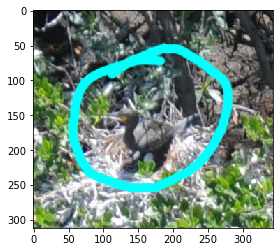

In [8]:
#boundingCoordinates is a list of the defining coordinates of each circle
boundingCoordinates = [] #[[rmin, rmax], [cmin, cmax]], [[rmin, rmax], [cmin, cmax]]
                            #Circle 1                      #Circle 2

img = img[325 : 637, 1257 : 1601]
plt.imshow(img)
visited_map = np.zeros(img.shape[:2], dtype=bool)
curr_bounds = [len(img) + 1, -1, len(img[0]) + 1, -1]
#curr_bounds = {"rmin": len(img) + 1, "rmax": -1, "cmin":len(img[0]) + 1, "cmax": -1}
print(curr_bounds)

def find_circles(img):
    global curr_bounds
    first = False
    for i, row in enumerate(img):
        for j, triple in enumerate(row):
            color_func = isMuxoColor(triple)
            #is Muxo color returns a function
            if (color_func):
                visited_map = np.zeros(img.shape, dtype=bool) # makes this an array of all False
                curr_bounds = [len(img) + 1, -1, len(img[0]) + 1, -1]
                #curr_bounds = {"rmin": len(img) + 1, "rmax": -1, "cmin":len(img[0]) + 1, "cmax": -1}
                find_coordinates(img, i, j, color_func)
                print(curr_bounds)
                rmin = curr_bounds[0]
                rmax = curr_bounds[1]
                cmin = curr_bounds[2]
                cmax = curr_bounds[3]
                boundingCoordinates.append(curr_bounds)
                img[rmin : rmax, cmin: cmax] = [0, 0, 0]
                first = True
                #to account for handwriting, filter out bounding boxes where 
                #(ymin-ymax) is very different from (xmin-xmax)
            if (first):
                break
        if (first):
            break
        
        

        
#the [row, column] rgb triple we have flagged as part of a circle

# walks along contiguous segment of image with given color
# returns [[rmin,rmax],[cmin,cmax]] for that segment -> will be used to
# give coordinates of the bounding box later
def find_coordinates(img, row_id, col_id, color_func):
    global curr_bounds
    if visited_map[row_id][col_id]:
        return None
    visited_map[row_id][col_id] = True
    if not color_func(img[row_id][col_id]): # out of circle
        return None
    # need to change to <= and >= instead of < and >
    if row_id > curr_bounds[1]:
        curr_bounds[1] = row_id
    elif row_id < curr_bounds[0]:
        curr_bounds[0] = row_id
    elif col_id < curr_bounds[2]:
        curr_bounds[2] = col_id
    elif col_id > curr_bounds[3]:
        curr_bounds[3] = col_id
    find_coordinates(img, row_id - 5, col_id + 5, color_func)
    find_coordinates(img, row_id + 5, col_id + 5, color_func)
    find_coordinates(img, row_id + 5, col_id - 5, color_func)
    find_coordinates(img, row_id, col_id - 5, color_func)
    #find_coordinates(img, row_id - 5, col_id, color_func)
    #find_coordinates(img, row_id, col_id + 5, color_func)
    #find_coordinates(img, row_id - 5, col_id - 5, color_func)
    #find_coordinates(img, row_id - 5, col_id, color_func)
    #find_coordinates(img, row_id + 5, col_id, color_func)
    #find_coordinates(img, row_id, col_id - 5, color_func)
    #find_coordinates(img, row_id - 5, col_id - 5, color_func)
    return None
  


In [228]:
#Overlay rectangles defined by coordinates onto copy of original image

Another approach: https://www.codingame.com/playgrounds/38470/how-to-detect-circles-in-images

Canney edge detection --> find strong edges (colored circles will be especially
strong) --> step through circles (parameterized by r and theta) and add points
that are shared by Canney strong edges --> this (should) eliminate handwriting


--> /then/ draw bounding boxes (by taking xmin, xmax, ymin, ymax) for each
parameterized circle



In [229]:
find_circles(img)

[53, 258, 52, 282]


Our function is tail-recursive, so this should work:
https://stackoverflow.com/questions/13591970/does-python-optimize-tail-recursion

(we just need to make it a while loop)

And this might end up being important (passing a list to simultaneous recursive calls): https://docs.python.org/3/library/copy.html

In [230]:
print(boundingCoordinates)

[[53, 258, 52, 282]]


open CV function: identify colors in an image by specifying their rgb boundaries
https://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/


In [231]:
print(visited_map)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


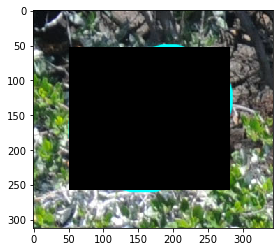

In [232]:
plt.imshow(img)

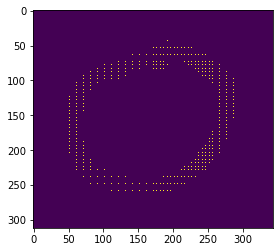

In [233]:
plt.imshow(visited_map)